# Linear Models in Machine Learning on Python - Support Vector Machines 4 Regression

Welcome to the 14th notebook. In this notebook we will learn four regression algorithms. I will only talk about one of them in depth because the other three are not that commonly used I think. Nevertheless, as always I will share extra documents in which you can find more about mathematics behind them. Let's get started with the most important one, Support Vector Regression.


Previously we used support vectors to seperate two classes (or more classes by using some strategies). We can use the same support vectors to tune a line to fit a regression line. In this case the algorithm is called Support Vector Regression. Let's find out how it works.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

## Math behind SVR

<div>
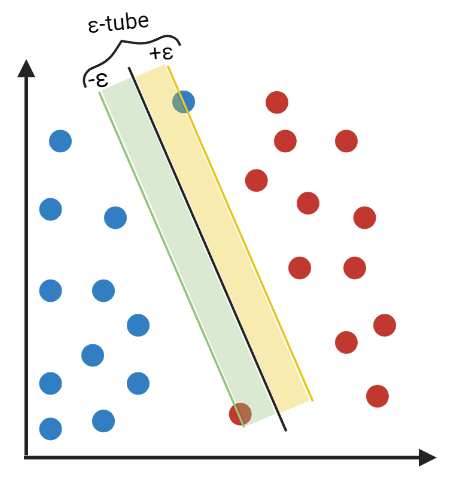
</div>

Let's start with the picture above and introduce the most important difference compared to SVC. The algorithm has a region called $\epsilon$-tube or $\epsilon$-insensitive tube. The cost function we have is insensitive to the points inside that tube, this is the reason it is called epsilon insensitive tube and insensitive cost. This concept of tube is actually like the soft margin classifier because by using this tube we, to some extent, allow margin errors. Let's go through the algorithm step-by-step and see how it uses this cost function.


1. The main objective of the algorithm is to find narrowest tube while minimizing the loss function which can be defined as the distance between prediction and target.

$$min_w=\frac{1}{2}w^Tw$$

2. We need to define constraints and add a loss term to the objective function above, just as we added hinge loss in Support Vector Classifier. This loss term is epsilon insensitive loss.


<div>
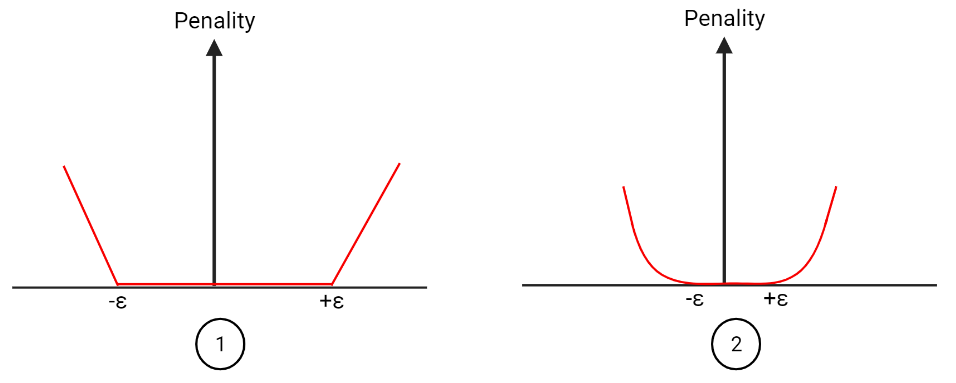
</div>

The function in the first plot is called epsilon insensitive loss and defined as

$$L_{\epsilon }\:\:\left(y,f\left(x,w\right)\right)=\begin{cases}0&,\:for\:\left|y-f\left(x\right)\right|\le \:\epsilon \:\:\:\:\:\\ \:\left(\left|y-f\left(x,w\right)\right|-\epsilon\right)&,\:otherwise\end{cases}$$

and the second one is square insensitive loss and defined as

$$L_{\epsilon }\:\:\left(y,f\left(x,w\right)\right)=\begin{cases}0&,\:for\:\left|y-f\left(x\right)\right|\le \:\epsilon \:\:\:\:\:\\ \:\left(\left|y-f\left(x,w\right)\right|-\epsilon\right)^2&,\:otherwise\end{cases}$$

3. The cost function penalizes points that are farther than $\epsilon$ from the target.

4. We also know that epsilon determines the width of the tube. In that case, as we talked above in the beginning, we don't penalize points inside the tube and penalize points outside to tune our regression line. In fact, we are using the points outside tube as our support vectors and optimize the model. If you look at the first picture when we lower width of the tube ( this means decreasing epsilon) we will have a narrower tube which corresponds to a lower tolerance for errors and we get more support vectors. If we increase the width of the tube (this means increasing epsilon) we will tolerate more errors and have less support vectors. 

### Primal Form of SVR

By using the loss function above we can derive the primal form as follows.

$$\frac{1}{2}w^Tw+C\cdot \sum_{i=1}^m\:\zeta \:_i+\zeta _i^{\ast}$$

subject to

$$y_i-w^Tx_i\le \:\epsilon \:+\zeta ^{\ast }_i\:\: for\:\: i=1,2,3,..,m$$

$$w^Tx_i-y_i\le \epsilon +\zeta _i\:\:\: for\:\: i=1,2,3,..,m$$


$$\zeta _i,\zeta _i^{\ast }\ge \:0\:\: for\:\: i=1,2,3,..,m$$

By using the Primal Problem we can derive the Lagrange function as follows

$$L_p\left(w,\:\zeta ^{\ast },\:\zeta ,\:\:\lambda ,\:\:\lambda ^{\ast },\:\alpha ,\:\alpha ^{\ast }\right)=$$


$$\frac{1}{2}w^Tw+C\cdot \:\sum _{i=1}^m\:\zeta _i+\zeta \:_i^{\ast }+\sum_{i=1}^m\alpha _i^{\ast \:}\left(y_i-w^Tx_i-\epsilon -\zeta _i\:^{\ast \:}\right)+\sum_{i=1}^m\alpha _i\left(-y_i+w^Tx_i-\epsilon \:-\zeta _i\:\:\right)-\sum_{i=1}^m\lambda \:_i\cdot \zeta _i\:+\lambda _i^{\ast \:}\cdot \zeta _i\:^{\ast \:}$$

If we derivate the lagrangian with respect to each term in the function, we can get the conditions for dual form. I will not show these conditions here, however, you can find them in the paper that I shared at the end.

### Dual Form of SVR

Let's now get our dual form.

$$L_D\left(\alpha ,\:\alpha ^{\ast }\right)=-\epsilon \cdot \sum _{i=1}^{N_{sv}}\:\left(\alpha _i\:+\alpha _i^{\ast \:}\right)+\sum _{i=1}^{N_{sv}}\:\left(\alpha _i^{\ast }-\alpha \:\:_i\right)y_i+\frac{1}{2}\sum _{j=1}^{N_{sv}}\sum _{i=1}^{N_{sv}}\left(\alpha \:_i^{\ast \:}-\alpha _i\right)\left(\alpha _j^{\ast }-\alpha _j\right)x_i^Tx_j$$

subject to

$$\sum _{i=1}^{N_{sv}}\:\left(\alpha _i^{\ast \:\:}-\alpha \:_i\right)=0\:\: and \:\:a_i,a_j\:\in \left[0,C\right]$$

and finally we can approximate the regression estimate by using the following equation.

$$f\left(x\right)=\sum _{i=1}^{N_{sv}}\:\left(\alpha _i^{\ast \:\:}-\alpha \:_i\right)x_i^Tx\:+b\:\:for\:\alpha \:_i^{\ast },\alpha _i\:\in \left[0,C\right]$$


Note: $N_{sv}$ = number of support vectors and don't forget that dual form is a maximization problem, whereas, the primal form is a minimization problem.


### Kernels

We can use Kernels in SVR as we used them in SVC. The main idea is almost the same. We map input space into a higher dimensional space but this time we don't do it for getting a better classification score but we are doing it for getting a better regression line. Let's define dual form of SVR with kernel function included:

$$L_D\left(\alpha,\: \alpha^{\ast \:}\right)=-\epsilon \cdot \:\sum _{i=1}^{N_{sv}}\left(\alpha \:_i\:+\alpha _i^{\ast }\right)+\sum_{i=1}^{N_{sv}}\left(\alpha _i^{\ast }-\alpha_i\right)y_i+\frac{1}{2}\sum _{j=1}^{N_{sv}}\sum _{i=1}^{N_{sv}}\left(\alpha_i^{\ast}-\alpha \:_i\right)\left(\alpha_j^{\ast }-\alpha _j\right)K\left(x_i,x_j\right)$$

subject to

$$\sum_{i=1}^{N_{sv}}\:\left(\alpha_i^{\ast }-\alpha_i\right)=0,\: and \: a_i,a_j\in \:\left[0,C\right]$$

Let's also define the Kernel function.

$$K\left(x_i,x\right)=\phi \left(x_i\right)\phi \left(x\right)$$


and finaly we can estimate the regression line by using the following equation.

$$f\left(x\right)=\sum_{i=1}^{N_{sv}}\left(\alpha_i^{\ast }-\alpha_i\right)K\left(x_i,x\right)+b$$


**Sources:**

1. Firstly I will share two medium articles about SVR: [An Introduction to Support Vector Regression (SVR)](https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2) and [Support Vector Regression and it’s Mathematical Implementation](https://medium.com/swlh/support-vector-regression-and-its-mathematical-implementation-4800456e4878)
2. I took almost all the equations from the following paper. The paper introduces the concepts and mathematics under the hood very well. I highly recommend reading it [Support Vector Regression](https://www.researchgate.net/publication/300719035_Support_Vector_Regression)
3. Paul Scharater from University of Minnesota has awesome lecture notes for Support Vector Regressor. This notes are especially important because even though the paper above represents the idea in depth, it doesn't actually contain how to implement Nu-SVR or how Mercer's Theorem works for regression [link](http://vision.psych.umn.edu/users/schrater/schrater_lab/courses/PattRecog09/RegressionII.pdf)
4. MATLAB's documentation also has a good mathematical explanation for SVR [link](https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html)


We are done !! Let's use the algorithm...

I will use california housing dataset for regression models that I will introduce. This is actually a very well-known dataset but it will probably be our first time using that dataset.The aim is to predict median house price and I will directly use sklearn to load the dataset.

In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [3]:
predictors = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
predictors.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Let's scale the predictors.

In [4]:
predictors=StandardScaler().fit_transform(predictors)

Let's also get the target feature and then we can use `train_test_split()`.

In [5]:
target=california_housing.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 42)

## Linear SVR

I will firstly use `LinearSVR()` just like I used `SVC()` in the first notebook. We will tune almost the same parameters by using gridsearch but this time we will use insensitive epsilon loss instead of hinge loss. Moreover, for all the examples I will use `RandomizedSearchCV()` not to spend too much time for tuning. 


Documentation for LinearSVR: [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)

In [42]:
from sklearn.svm import LinearSVR

In [43]:
params1 = {
    'C':[0.25,0.50,0.75,1,3,10,50,100],
    'loss': ["epsilon_insensitive","squared_epsilon_insensitive"],
    'fit_intercept':[True,False],
    'dual':[True,False],
    
}

In [ ]:
rscv=RandomizedSearchCV(LinearSVR(), params1, cv=5,verbose=20,scoring="neg_mean_squared_error")

In [ ]:
model=rscv.fit(X_train,y_train)

In [ ]:
mean_squared_error(model.predict(X_test),y_test)

0.5551489167490848

The algorithm works well on this data.

# SVR

Now let's use `SVR()`. Hyperparameters are almost the same as `SVC()`, however, for SVR we also have epsilon paramater that we talked about. Have a look at documentation for learning more about the parameters [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [7]:
from sklearn.svm import SVR

In [8]:
params2 = {
    'C':[0.50,0.75,1,10,50],
    'epsilon':[0.1,0.3,0.7],
    'kernel': ["linear","poly","rbf","sigmoid"],
    'gamma': ["scale","auto"],
    'degree':[2,3], 
}

In [9]:
rscv=RandomizedSearchCV(SVR(), params2, cv=5,verbose=20,scoring="neg_mean_squared_error")

In [ ]:
model=rscv.fit(X_train,y_train)

In [11]:
mean_squared_error(model.predict(X_test),y_test)

0.35503059000030135

SVR seems like performing better than LinearSVR which is actually something expected. Let's also use Nu-SVR.

# Nu-SVR

In [6]:
from sklearn.svm import NuSVR

We have the same parameters as `NuSVC()`. 

Documentation [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html)

In [7]:
params3 = {
    'nu':[0.25,0.50,0.75,0.95],
    'kernel': ["linear","poly","rbf","sigmoid"],
    'gamma': ["scale","auto"],
    'degree':[2,3], 
}

In [8]:
rscv=RandomizedSearchCV(NuSVR(), params3, cv=5,verbose=20,scoring="neg_mean_squared_error")

In [ ]:
model=rscv.fit(X_train,y_train)

In [12]:
mean_squared_error(model.predict(X_test),y_test)

0.35577164624532537

NuSVR performs almost as good as SVR for this dataset.

# Other Regression Algorithms

In the [linear models documentation](https://scikit-learn.org/stable/modules/linear_model.html#) of sklearn, there are some regression algorithms that I didn't introduce. Instead of providing the mathematics and algorithm behind, I will focus on briefly how to use this algorithms and share sources in which you can find necessary informations about these algorithms. I was actually planning to make another notebook about these regression algorithms and include the math behind them but they are not often used, thus, I chose to briefly mention them here.

## Least Angle Regression

LARS is a stepwise regression algorithm which at each step tries to find the most correlated feature with the target and tunes the regression line towards the most correlated feature. You can find a good explanation about the algorithm on [GeeksforGeeks](https://www.geeksforgeeks.org/least-angle-regression-lars/). Moreover, there is a good explanation in one of Quora posts [link](https://www.quora.com/What-is-an-intuitive-explanation-for-least-angle-regression). However, If you'd like to read a more mathematical sources I recommend this paper [Least Angle Regression](https://hastie.su.domains/Papers/LARS/LeastAngle_2002.pdf). Let's use the algorithm.

Sklearn provides us `Lars()` estimator for using LARS, however, I will use `LassoLars()` which combined lasso regularization and LARS algorithm.

You can find more about the algorithm in the linear model documentation that I shared above as well as in LassoLars documentation: [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars)

In [13]:
from sklearn.linear_model import LassoLars # we will be using Lasso regularized version of the algorithm.

In [14]:
ll=LassoLars()

In [15]:
params4 = {
    'alpha':[0.25,0.50,0.75,1,3,5,10],
    'positive': [True,False],
    'normalize': [True,False],
    'fit_intercept':[True,False], 
}

In [16]:
rscv=RandomizedSearchCV(ll, params4, cv=10,verbose=2,scoring="neg_mean_squared_error")

In [ ]:
model=rscv.fit(X_train,y_train)

In [18]:
mean_squared_error(model.predict(X_test),y_test)

0.9389005423747067

## Bayesian Regression

Bayesian Regression is an regression algorithm that is based on Bayesian Inference. You can find a good explanation of it in the SVR paper that I shared above, there is a section about Bayesian Regression at the end of the paper. In addition to that, there are also lots of good sources for that algorithm.

1. Ritvikmath has a video about this algorithm (In fact this video introduced me this algorithm for the first time) [link](https://www.youtube.com/watch?v=Z6HGJMUakmc).
2. There are two well-written medium articles about that algorithm. [Bayesian Statistics Overview and your first Bayesian Linear Regression Model](https://towardsdatascience.com/bayesian-statistics-overview-and-your-first-bayesian-linear-regression-model-ba566676c5a7) and [Introduction to Bayesian Linear Regression](https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7). 
3. This is a very well-written introduction to Bayesian Regression in which you can find both practice and theory. [link](https://statswithr.github.io/book/introduction-to-bayesian-regression.html).
4. GeeksforGeeks has a good article about this algorithm [link](https://www.geeksforgeeks.org/implementation-of-bayesian-regression/).
5. Lastly, there are course notes [link](https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec19-slides.pdf).

Sklearn documentation for Bayesian Regression [link](https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html)

Let's use the algorithm now.

In [19]:
from sklearn.linear_model import BayesianRidge

In [20]:
br=BayesianRidge()

In [21]:
params5 = {
    'alpha_1':np.geomspace(1e-9, 1e1, num=10),
    'alpha_2':np.geomspace(1e-9, 1e1, num=10),
    'lambda_1':np.geomspace(1e-9, 1e1, num=10),
    'lambda_2':np.geomspace(1e-9, 1e1, num=10),
    'normalize': [True,False],
    'fit_intercept':[True,False], 
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(br, params5, cv=10,verbose=2,scoring="neg_mean_squared_error")

In [ ]:
model=rscv.fit(X_train,y_train)

In [24]:
mean_squared_error(model.predict(X_test),y_test)

0.5558505437321843

## Quantile Regression

Lastly, we will use Quantile Regression. In the previous linear regression algorithms we used, there was a connection between the linear predictor and mean or median. The quantile regression extends this idea and estimates any quantile that we are interested in. It generally estimates 50th quantile which corresponds to median, however, we can use it to estimate for any quantile. 

For more about Quantile Regression:
1. Firstly I recommend reading this Medium article [Quantile Regression](https://towardsdatascience.com/quantile-regression-ff2343c4a03)
2. Secondly, This article introduces the math in a more formal fashion [link](https://statisticaloddsandends.wordpress.com/2019/02/09/the-math-behind-quantile-regression/)
3. Lastly you can look through this lecture notes [link](https://math.iupui.edu/~hanxpeng/Talks/Q_Reg.pdf)

Sklearn Documentation for Quantile Regression: [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor)

In [7]:
from sklearn.linear_model import QuantileRegressor

In [8]:
qr=QuantileRegressor(alpha=0.6,quantile=0.75,fit_intercept=True,solver="highs-ipm")

In [9]:
quantile_reg=qr.fit(X_train,y_train)

In [10]:
mean_squared_error(quantile_reg.predict(X_test),y_test)

1.666814281709787

You may wonder why I didn't use hyperparameter tuning. The drawback of Quantile Regression is that it allocates too much memory and using hyperparameter tuning makes it even worse. I actually tuned the model with RandomizedSearchCV one time and got 0.53 mean squared error but then I accidentally deleted the output. Since I think It's not a widely used algorithm I didn't spend another 6 hours tuning a quantile regression model. Moreover, I actually used this regression model on R for a couple of times and even though there was a similar problem with R I didn't have as much trouble as I did while using Quantile Regression on Python.

# Comparison of Regression Models in This Notebook

Let's also have a quick example and compare the regression algorithms in this notebook on more real-world-like dataset. I will use facebook comment dataset and try to predict number of columns. Let's get started

I will firstly load the dataset. I downloaded the file from Kaggle [link](https://www.kaggle.com/kiranraje/prediction-facebook-comment). In fact, this dataset can be found on UCI Data Repository and I previously took it from there for another project but I found this version easier to use.

In [2]:
data=pd.read_csv("Dataset.csv")

In [3]:
data.head(5)

,likes,Checkins,Returns,Category,commBase,comm24,comm48,comm24_1,diff2448,baseTime,...,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,634995,0,463.0,1.0,0.0,0,0.0,0,0,65,...,0,0,0,0.0,0,0,0,0,1,0
1,634995,0,463.0,1.0,0.0,0,0.0,0,0,10,...,0,0,0,0.0,0,0,0,1,0,0
2,634995,0,463.0,1.0,0.0,0,0.0,0,0,14,...,1,0,0,0.0,0,0,0,0,1,0
3,634995,0,463.0,1.0,7.0,0,3.0,7,-3,62,...,1,0,0,1.0,0,0,0,0,0,0
4,634995,0,463.0,1.0,1.0,0,0.0,1,0,58,...,0,0,0,0.0,0,1,0,0,0,0


I will not use all the features while training the model. I chose the features that are used in this kaggle [post](https://www.kaggle.com/code/vinayvk1808/facebook-comment-dataset-using-random-forest)

In [4]:
predictors=data[['likes', 'Checkins', 'Returns', 'Category', 'commBase', 'comm24',
       'comm48', 'comm24_1', 'diff2448', 'baseTime', 'length', 'hrs',
       'sun_pub', 'tue_pub', 'wed_pub', 'fri_pub', 'sat_pub', 'sun_base',
       'tue_base', 'wed_base', 'thu_base','fri_base']]
target=data["output"]

In [5]:
predictors.head(5)

,likes,Checkins,Returns,Category,commBase,comm24,comm48,comm24_1,diff2448,baseTime,...,sun_pub,tue_pub,wed_pub,fri_pub,sat_pub,sun_base,tue_base,wed_base,thu_base,fri_base
0,634995,0,463.0,1.0,0.0,0,0.0,0,0,65,...,0,0,1,0,0,0,0,0,0,0
1,634995,0,463.0,1.0,0.0,0,0.0,0,0,10,...,0,0,0,0,0,0,0,0,0,1
2,634995,0,463.0,1.0,0.0,0,0.0,0,0,14,...,0,0,0,1,0,0,0,0,0,0
3,634995,0,463.0,1.0,7.0,0,3.0,7,-3,62,...,0,0,0,1,0,0,0,0,0,0
4,634995,0,463.0,1.0,1.0,0,0.0,1,0,58,...,0,0,0,0,0,0,0,1,0,0


Now let's do some preprocessing. I will use `SimpleImputer()`, `StandardScaler()` and `PolynomialFeatures()`.

In [6]:
from sklearn.impute import SimpleImputer
predictors=SimpleImputer(strategy='median').fit_transform(predictors)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
predictors_pf=PolynomialFeatures(degree=2).fit_transform(predictors)

In [8]:
from sklearn.preprocessing import StandardScaler
predictors_scaled=StandardScaler().fit_transform(predictors_pf)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target, test_size=0.2,random_state=42) 

Since I will use all the regression algorithms in this notebook, I will define my own hyperparameter tuning function not to repeat the similars codes everytime.

In [10]:
def RegressorCV(estimator,parameters):
    rscv=RandomizedSearchCV(estimator, parameters, cv=5,verbose=2,scoring="neg_mean_squared_error");
    model=rscv.fit(X_train,y_train)
    mean_squared_error(model.predict(X_test),y_test)
    results = {'MSE':mean_squared_error(y_test,rscv.predict(X_test)),
           'Best_Model':rscv.best_params_,
           'CV_results':pd.DataFrame(rscv.cv_results_),
           'RSquared':r2_score(rscv.predict(X_test),y_test)}
    return results

Let's now use `RegressorCV()` with each regression algorithm on the dataset.

In [ ]:
from sklearn.svm import LinearSVR
results_LinearSVR=RegressorCV(LinearSVR(),params1)

In [ ]:
results_SVR=RegressorCV(SVR(),params2)

In [ ]:
from sklearn.svm import NuSVR
results_NuSVR=RegressorCV(NuSVR(),params3)

In [ ]:
results_LARS=RegressorCV(LassoLars(),params4) 

In [ ]:
results_BR=RegressorCV(BayesianRidge(),params5)

Let's show the results in a dataframe.

In [58]:
mse_vals = [results_LinearSVR["MSE"],results_SVR["MSE"],results_NuSVR["MSE"],results_LARS["MSE"],results_BR["MSE"]]
best_params=[results_LinearSVR["Best_Model"],results_SVR["Best_Model"],results_NuSVR["Best_Model"],results_LARS["Best_Model"],results_BR["Best_Model"]]
labels = {0:'Linear SVR',1:'SVR', 2:'Nu-SVR',3:'LARS',4:'Bayesian Regression'}
columns={0:'MSE',1:'Best Parameters'}

df =pd.DataFrame([mse_vals, best_params])
df.rename(columns=labels, index=columns, inplace=True)
pd.set_option('display.max_colwidth', 1000)
df

,Linear SVR,SVR,Nu-SVR,LARS,Bayesian Regression
MSE,574.724661,573.902483,566.157888,581.996072,514.9988
Best Parameters,"{'loss': 'epsilon_insensitive', 'fit_intercept': True, 'dual': True, 'C': 0.75}","{'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.3, 'degree': 3, 'C': 0.75}","{'nu': 0.25, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2}","{'positive': False, 'normalize': False, 'fit_intercept': False, 'alpha': 0.5}","{'normalize': False, 'lambda_2': 10.0, 'lambda_1': 0.7742636826811278, 'fit_intercept': True, 'alpha_2': 2.1544346900318865e-06, 'alpha_1': 2.782559402207126e-05}"


It looks like with the parameters we choosed to optimize, Bayesian Regression performs better. However, All of these models actually doesn't perform well. We can tune the model further and engineer the data to get a better result. Nonetheless, I leave doing this to another notebook. Also I didn't use quantile regression because of the memory problems I mentioned.